<a href="https://colab.research.google.com/github/igor531205/data_science/blob/main/lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Выполнил Пушкарев Игорь Игоревич. Группа 23.М08-мм.***

### Исследовательский анализ данных.

---

Проведите исследовательский анализ данных для датасета [Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance/data).
* Задача 1. Постройте гистограммы частот непрерывных признаков, проанализируйте наличие выбросов;
* Задача 2. Сравните выраженность непрерывных признаков между группами мужчин и женщин при помощи статистического критерия;
* Задача 3. Проанализируйте корреляции непрерывных признаков, проведите статистический вывод.

---

*Импортируем необходимые для дальнейшей работы библиотеки.*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn
from scipy.stats import shapiro, mannwhitneyu

# отключаем предупреждения
warn.filterwarnings('ignore')

*Загружаем данные по ссылке*



In [ ]:
# ссылка на датасет
link = 'https://raw.githubusercontent.com/igor531205/data_science/main/datasets/insurance.csv'

# Считываем данные
df=pd.read_csv(link, index_col=False)

# Отключаем ограничение в отображении столбцов
pd.options.display.max_columns = None

# Выводим 5 первых строк
df.head(n=5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


*Выведем сводную информацию о DataFrame*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*Выведем все столбцы*

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Columns:
* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance

*Выведем информацию по количественным признакам*

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


*Выведем размеры таблицы (кол-во строк, кол-во столбцов)*

In [ ]:
df.shape

(1338, 7)

*Группировка данных по полу*

In [ ]:
df.groupby('sex').agg({
    'age': 'mean',
    'bmi': 'mean',
    'charges': 'mean'
}).reset_index()

,sex,age,bmi,charges
0,female,39.503021,30.377749,12569.578844
1,male,38.917160,30.943129,13956.751178


*Выведем гистограммы частот непрерывных признаков*

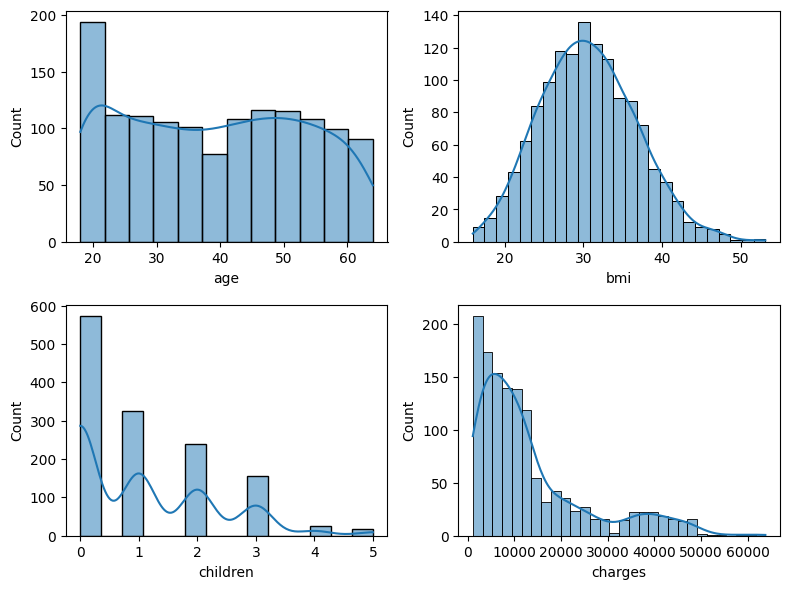

In [ ]:
# Количественные признаки в датасете
features = ['age', 'bmi', 'children', 'charges']

# Создание гистограмм для каждого признака
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
ax = ax.flatten()

for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=ax[i])

plt.tight_layout()
plt.show()

* age - распределение возрастов показывает равномерный вид с пиком в начале около 20 лет (это может указывать на высокий интерес к страхованию среди молодежи);
* bmi - распределение индекса массы тела имеет колокообразный вид, с центром около 30, однако имеются выбросы в области высоких значений, что может указывать на наличие людей с избыточным весом или ожирением;
* children - количество застрахованных детей показывает скошенность в право, поскольку семьи с очень большим количеством детей встречаются реже;
* charges - распределение страховых взносов сильно скошено вправо, что указывает на наличие большого количества клиентов с обязательным страхованием (минимальным платежом) и относительно небольшого числа клиентов с очень высокими страховыми взносами (наличие выбросов с очень высокими страховыми взносами), что может быть связано с высоким риском или уже имеющимися заболеваниями.

*Выведем влияние курения на страховые взносы*

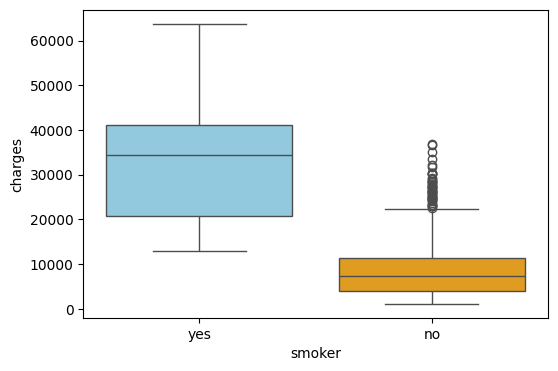

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='smoker', y='charges', data=df, palette={'yes': 'skyblue', 'no': 'orange'})
plt.show()

Боксплоты демонстрируют значительное влияние курения на страховые взносы, что подчеркивает курение как фактор риска.

*Выведем влияние пола на страховые взносы*

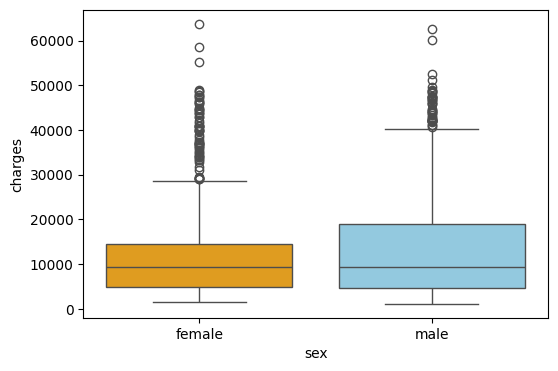

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='sex', y='charges', data=df, palette={'male': 'skyblue', 'female': 'orange'})
plt.show()

Различия в страховых взносах между мужчинами и женщинами практически схожи (медианные значения находятся приблизительно на одном уровне), но у мужчин немного выше третий квартиль (75%). Возможно это связано, с тем, что мужчины курят чаще женщин.

*Выведем влияние курения и пола на страховые взносы*

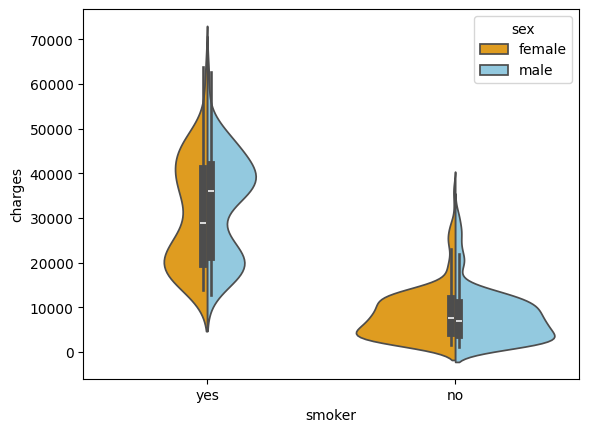

In [ ]:
ax = sns.violinplot(data=df, x='smoker', y="charges", hue='sex', split=True,
                    palette={'male': 'skyblue', 'female': 'orange'})
plt.show()

Как видно из графика, медианное значение курящих мужчин немного выше женщин.

*Выведем влияния возраста на страховые взносы с разделением по полу*

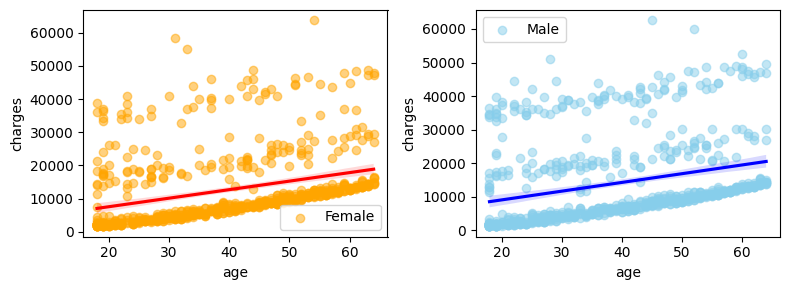

In [ ]:
# Категории признака 'sex' в датасете
categories = ['female', 'male']

# Создание субплотов для каждой категории
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

for i, sex in enumerate(categories):

    df_filtered = df[df['sex'] == sex] # Фильтрация данных по полу

    sns.regplot(x='age', y='charges', data=df_filtered,
                scatter_kws={'alpha':0.5, 'color':'skyblue' if sex == 'male' else 'orange'},
                line_kws={'color':'blue' if sex == 'male' else 'red'},
                ax=ax[i], label=sex.capitalize())
    ax[i].legend()

plt.tight_layout()
plt.show()

С возрастом увеличиваются взносы для обоих полов, значительного отличия взносов между мужчинами и женщинами не наблюдаются.

*Выведем влияния возраста на страховые взносы с разделением по отношению к курению*

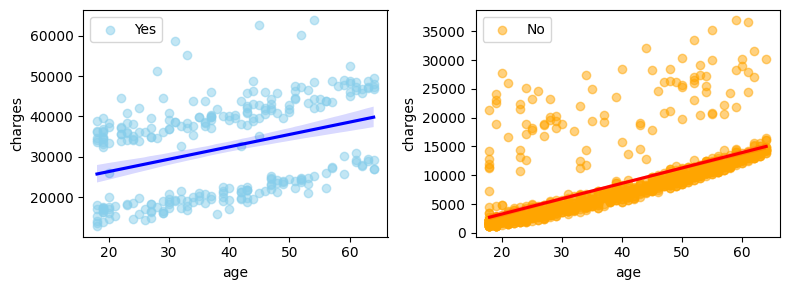

In [ ]:
# Категории признака 'smoker' в датасете
categories = ['yes', 'no']

# Создание субплотов для каждой категории
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

for i, smoker in enumerate(categories):

    df_filtered = df[df['smoker'] == smoker] # Фильтрация данных

    sns.regplot(x='age', y='charges', data=df_filtered,
                scatter_kws={'alpha':0.5, 'color':'skyblue' if smoker == 'yes' else 'orange'},
                line_kws={'color':'blue' if smoker == 'yes' else 'red'},
                ax=ax[i], label=smoker.capitalize())
    ax[i].legend()

plt.tight_layout()
plt.show()

С возрастом увеличиваются взносы для курящих и не курящих, но взносы для курящих значительно выше.

*Сравним выраженность непрерывных признаков между группами мужчин и женщин при помощи статистического критерия. Проведем проверку на нормальность распределения*

In [ ]:
normality_test_results = {
    "feature": [],
    "sex": [],
    "p-value": []
}

for feature in ['age', 'bmi', 'charges']:
    for sex in ['male', 'female']:
        stat, p = shapiro(df[df['sex'] == sex][feature])
        normality_test_results["feature"].append(feature)
        normality_test_results["sex"].append(sex)
        normality_test_results["p-value"].append(p)

pd.DataFrame(normality_test_results)

,feature,sex,p-value
0,age,male,2.623831e-15
1,age,female,6.548718e-15
2,bmi,male,3.130642e-03
3,bmi,female,3.545490e-03
4,charges,male,1.178851e-26
5,charges,female,1.830528e-27


Результаты проверки на нормальность распределения показывают, что p-значения для всех признаков (age, bmi, charges) в группах мужчин и женщин меньше 0.05.  Для сравнения выраженности этих признаков между группами лучше использовать тест Манна-Уитни.

*Сравним выраженность непрерывных признаков между группами мужчин и женщин с помощью теста Манна-Уитни*

In [ ]:
mann_whitney_results = {
    "feature": [],
    "p-value": []
}

for feature in ['age', 'bmi', 'charges']:
    stat, p = mannwhitneyu(df[df['sex'] == 'male'][feature], df[df['sex'] == 'female'][feature])
    mann_whitney_results["feature"].append(feature)
    mann_whitney_results["p-value"].append(p)

pd.DataFrame(mann_whitney_results)

,feature,p-value
0,age,0.446774
1,bmi,0.101401
2,charges,0.728651


Результаты теста Манна-Уитни статистически значимых различий между мужчинами и женщинами не выявили.

*Выведем Боксплоты для непрерывных признаков с разделением по полу*

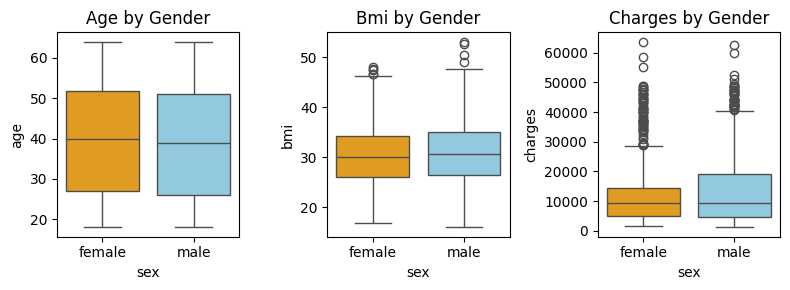

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(8, 3))

for ax, feature in zip(axes, ['age', 'bmi', 'charges']):
    sns.boxplot(x='sex', y=feature, data=df, ax=ax, palette={'male': 'skyblue', 'female': 'orange'})
    ax.set_title(f'{feature.capitalize()} by Gender')

plt.tight_layout()
plt.show()

Боксплоты подтверждают отсутствие статистически значимых различий между мужчинами и женщинами.

*Построим корреляцию непрерывных признаков*

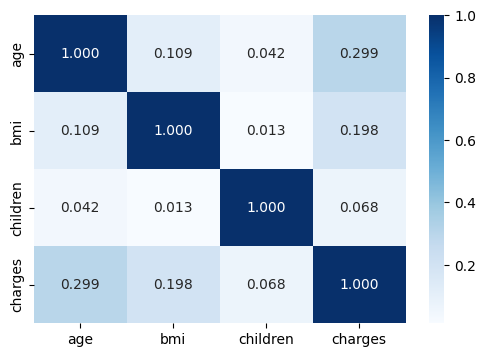

In [ ]:
# Расчет корреляций между непрерывными признаками
correlation_matrix = df[features].corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".3f")
plt.show()

Между возрастом (age) и страховыми взносами (charges) наблюдается корреляция с коэффициентом 0.299, что указывает на зависимость страховых взносов от возраста.

Корреляция между индексом массы тела (bmi) и страховыми взносами (charges) составляет 0.198, что свидетельствует о слабой связи между индексом массы тела и страховыми взносами.

Между количеством детей (children) и и страховыми взносами (charges) корреляция практически отсутствует.

Особое влияние на сумму страховых взносов оказывает курение, высокий индексом массы тела и пенсионный возраст, что связано с более высокими рисками для страховой компании.